In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import glob

VISUALIZATION_PATH = "./graphics/"

font_path = '../Helvetica Regular.otf'
bold_font_path = "../Helvetica CE Bold.otf"
normal_font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=bold_font_path)

In [22]:
data = pd.read_parquet("../data/data_parquet/weights.parquet", engine="pyarrow")

In [23]:
fuels = data[["minimum_take_off_fuels", "actual_take_off_fuels", "airline_code"]]
fuels= fuels.map(lambda x: None if isinstance(x, np.ndarray) and x.size == 0 else x)
len(fuels)

14810

In [24]:
# Function to adjust numbers based on length comparison
def adjust_numbers(row):
    actual_fuel = str(row["actual_take_off_fuels"])
    minimum_fuel = str(row["minimum_take_off_fuels"])
    digits_diff = abs(len(actual_fuel) - len(minimum_fuel))
    
    if digits_diff >= 1:
        if len(actual_fuel) > len(minimum_fuel):
            return int(actual_fuel[:-digits_diff]), row["minimum_take_off_fuels"]
        else:
            return row["actual_take_off_fuels"], int(minimum_fuel[:-digits_diff])
    else:
        return row["actual_take_off_fuels"], row["minimum_take_off_fuels"]

1922


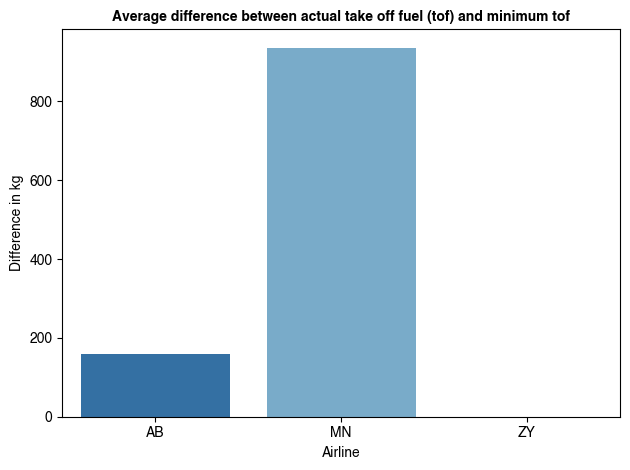

In [25]:
fuels = fuels.dropna()
fuels["actual_take_off_fuels"] = fuels["actual_take_off_fuels"].map(lambda x: x[-1])
fuels["minimum_take_off_fuels"] = fuels["minimum_take_off_fuels"].map(lambda x: x[-1])
fuels[["actual_take_off_fuels", "minimum_take_off_fuels"]] = fuels.apply(adjust_numbers, axis=1, result_type="expand")
fuels = fuels[fuels["minimum_take_off_fuels"] <= fuels["actual_take_off_fuels"]]
fuels["difference"] = fuels["actual_take_off_fuels"] - fuels["minimum_take_off_fuels"]
print(len(fuels))
fuels_grouped = fuels.groupby("airline_code").mean().sort_values("difference", ascending=False).reset_index()


sns.barplot(data=fuels, palette="Blues_r", y="difference", x="airline_code", errorbar=None, hue="airline_code", legend=False)
plt.title("Average difference between actual take off fuel (tof) and minimum tof", fontproperties=bold_font)
plt.xticks(fontproperties=normal_font);
plt.yticks(fontproperties=normal_font);
plt.xlabel("Airline", fontproperties=normal_font)
plt.ylabel("Difference in kg", fontproperties=normal_font)
plt.tight_layout()
plt.savefig(f"{VISUALIZATION_PATH}Fuel difference.svg", format="svg")

In [26]:
fuels_grouped

,airline_code,minimum_take_off_fuels,actual_take_off_fuels,difference
0,MN,20605.718284,21541.470149,935.751866
1,AB,8333.330579,8493.550177,160.219599
2,ZY,24565.333333,24565.333333,0.000000


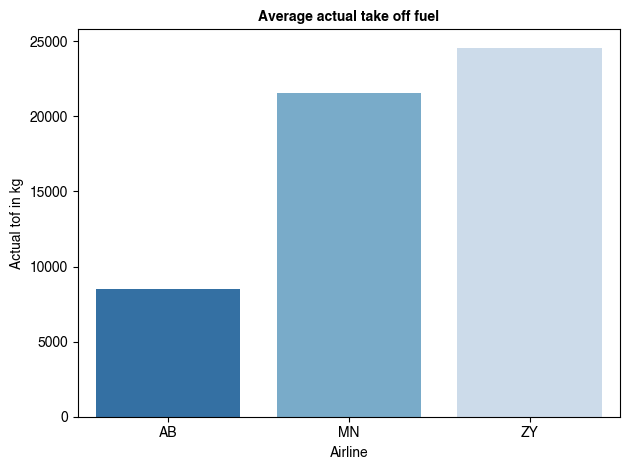

In [27]:
sns.barplot(data=fuels, palette="Blues_r", y="actual_take_off_fuels", x="airline_code", errorbar=None, hue="airline_code", legend=False)
plt.title("Average actual take off fuel", fontproperties=bold_font)
plt.xticks(fontproperties=normal_font);
plt.yticks(fontproperties=normal_font);
plt.xlabel("Airline", fontproperties=normal_font)
plt.ylabel("Actual tof in kg", fontproperties=normal_font)
plt.tight_layout()
plt.savefig(f"{VISUALIZATION_PATH}Actual tof.svg", format="svg")

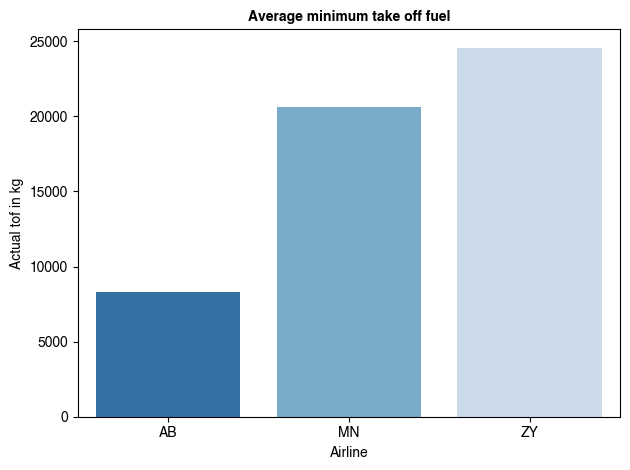

In [28]:
sns.barplot(data=fuels, palette="Blues_r", y="minimum_take_off_fuels", x="airline_code", errorbar=None, hue="airline_code", legend=False)
plt.title("Average minimum take off fuel", fontproperties=bold_font)
plt.xticks(fontproperties=normal_font);
plt.yticks(fontproperties=normal_font);
plt.xlabel("Airline", fontproperties=normal_font)
plt.ylabel("Actual tof in kg", fontproperties=normal_font)
plt.tight_layout()
plt.savefig(f"{VISUALIZATION_PATH}Minimum tof.svg", format="svg")